In [30]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

In [26]:
df1 = pd.read_csv('C:/Users/HP/Documents/Well PR/welldatatrainSHMAX_XX.csv')
df2 = pd.read_csv('C:/Users/HP/Documents/Well PR/welldatatrainSHMAX_Y.csv')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.4, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [60]:
#X_train = preprocessing.scale(X_train)

#X_test = preprocessing.scale(X_train)

Train on 501 samples, validate on 126 samples
Epoch 1/20
501/501 [==============================] - 53s 106ms/step - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 2/20
501/501 [==============================] - 0s 483us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 8.9056e-04 - val_mean_squared_error: 8.9056e-04
Epoch 3/20
501/501 [==============================] - 0s 211us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 7.2520e-04 - val_mean_squared_error: 7.2520e-04
Epoch 4/20
501/501 [==============================] - 0s 241us/step - loss: 7.2442e-04 - mean_squared_error: 7.2442e-04 - val_loss: 5.3989e-04 - val_mean_squared_error: 5.3989e-04
Epoch 5/20
501/501 [==============================] - 0s 201us/step - loss: 7.1262e-04 - mean_squared_error: 7.1262e-04 - val_loss: 5.3564e-04 - val_mean_squared_error: 5.3564e-04
Epoch 6/20
501/501 [==============================] - 0s 215us/step - loss: 6.9197e-0

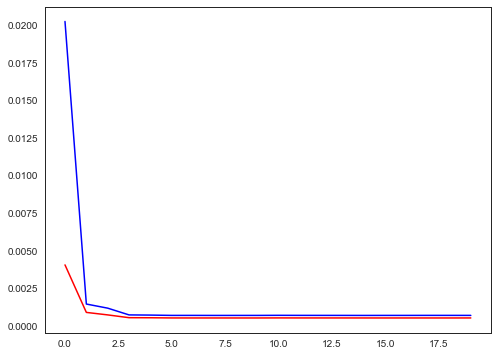

In [218]:
from keras.layers import Flatten
model = Sequential()
model.add(Dense(16, activation='softmax', input_shape=(7,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse', metrics=['mean_squared_error'])

history = model.fit(X_train, y_train, epochs = 20, validation_data =(X_val, y_val))

history_dict = history.history


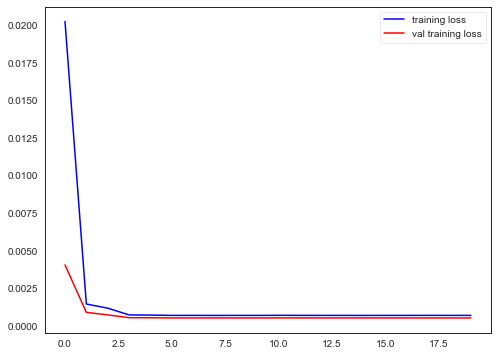

In [219]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(loss_values,'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.show()


In [69]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the train set is:	0.006
The R2 score on the test set is:	0.007


In [78]:
model.evaluate(X_test, y_test_pred)

418/418 [==============================] - 0s 210us/step


[1.6027791393557607e-05, 1.6027791393557607e-05]

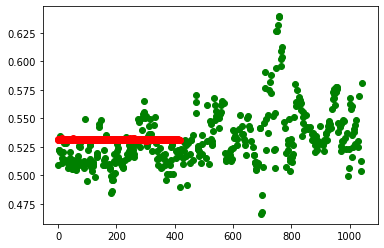

In [70]:

plt.clf()
#plt.plot(y_train,'go', y_train_pred, 'bo', label='Predicted SHmax')
plt.plot(y_test, 'go', y_test_pred, 'ro', label='val training loss')

In [71]:
y_test.describe

<bound method NDFrame.describe of      Shmax_norm
949    0.561793
94     0.549750
135    0.516194
614    0.526726
354    0.506751
..          ...
699    0.467778
494    0.527817
428    0.509886
139    0.542541
434    0.528504

[418 rows x 1 columns]>

In [84]:
y_test_pred.shape

(627, 1)

In [82]:
y_test

,Shmax_norm
716,0.575033
878,0.533110
253,0.519445
504,0.531692
490,0.511837
...,...
1035,0.529296
550,0.541137
815,0.564632
165,0.534935


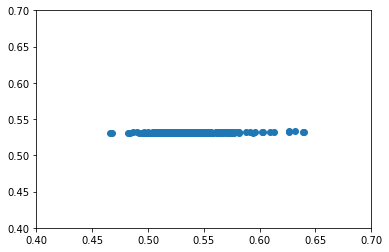

In [74]:
plt.scatter(y_test, y_test_pred, marker='o')
plt.xlim(0.4,0.7)
plt.ylim(0.4,0.7)
plt.show()

In [111]:
from pandas import DataFrame
df = DataFrame(y_test_pred)


In [114]:
export_csv=df.to_csv(r'C:\Users\HP\Documents\Well PR\result.csv',index=None, header=True)

In [118]:
df22=DataFrame(y_test)
export_csv=df22.to_csv(r'C:\Users\HP\Documents\Well PR\result22.csv',index=None, header=True)

In [116]:
print(df)

            0
0    0.543748
1    0.501325
2    0.518421
3    0.521353
4    0.601969
..        ...
413  0.516831
414  0.511101
415  0.534116
416  0.512377
417  0.538936

[418 rows x 1 columns]


In [117]:
print(df22)

     Shmax_norm
968    0.545275
687    0.502186
413    0.519406
204    0.522431
729    0.602812
..          ...
11     0.517854
131    0.511978
502    0.535322
386    0.513296
857    0.540300

[418 rows x 1 columns]
